#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import umap
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from docx import Document
import seaborn as sns
from docx.shared import Inches
from docx.oxml import OxmlElement
from docx.oxml.ns import qn

/Users/violetapascuallaborda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/violetapascuallaborda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
2024-07-04 15:34:22.020752: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Importing data

In [2]:
df = pd.read_excel("/Users/violetapascuallaborda/Desktop/Analysis/Predictive_Processing_Features.xlsx")
df

,Participant_ID,Mean_Predictability_Negative,Mean_Predictability_Positive,Predictive_Ability_Negative,Predictive_Ability_Positive,Mean_Predictability_RT,Mean_Likeability_RT,Distance_Negative,Distance_Positive,LR_Fulfilled,LR_Not_Fulfilled,Coherence_Fulfilled,Coherence_Not_Fulfilled
0,PREDWELL_RETOS-1-1,0.366667,0.433333,0.652778,1.194444,0.953844,0.985267,1.133333,0.933333,-0.062500,-0.209091,0.750000,0.666667
1,PREDWELL_RETOS-10-1,0.033333,0.033333,0.375000,1.000000,1.057556,1.421800,0.866667,0.866667,0.000000,-0.009091,0.527778,0.583333
2,PREDWELL_RETOS-1002-1,0.166667,0.300000,0.416667,1.222222,0.849711,1.373356,0.766667,0.866667,0.121324,-0.045455,0.527778,0.625000
3,PREDWELL_RETOS-1003-1,-0.400000,-0.100000,0.500000,1.166667,0.697067,1.218022,1.066667,1.066667,0.091912,0.045455,0.666667,0.708333
4,PREDWELL_RETOS-1004-1,-0.500000,-0.366667,0.138889,0.388889,1.096356,1.764933,0.866667,0.800000,0.095588,-0.045455,0.583333,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,PREDWELL_RETOS-5-1,-0.100000,-0.233333,0.541667,0.916667,0.983622,0.860244,1.200000,1.000000,0.029412,-0.145455,0.527778,0.708333
144,PREDWELL_RETOS-6-1,-0.300000,-0.100000,0.375000,1.027778,1.137444,1.652133,0.866667,0.466667,0.029412,0.000000,0.583333,0.625000
145,PREDWELL_RETOS-7-1,-0.033333,-0.166667,0.458333,1.111111,1.226067,0.959311,0.900000,1.000000,0.000000,0.000000,0.555556,0.666667
146,PREDWELL_RETOS-8-1,0.200000,-0.233333,0.305556,1.055556,0.818778,1.153400,1.366667,0.600000,0.029412,0.045455,0.500000,0.666667


In [3]:
df_features = df.drop('Participant_ID', axis=1)

### **Scaling**

#### Feature weighting

In [4]:
# Weighting factors
low_importance_weight = 0.5
high_importance_weight = 2.0

# Apply weighting factors
df_features[['Mean_Predictability_RT', 'Mean_Likeability_RT']] *= low_importance_weight
df_features[['LR_Fulfilled', 'LR_Not_Fulfilled', 'Coherence_Fulfilled', 'Coherence_Not_Fulfilled']] *= high_importance_weight

### **Dimensionality reduction**

#### PCA

In [5]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_features)

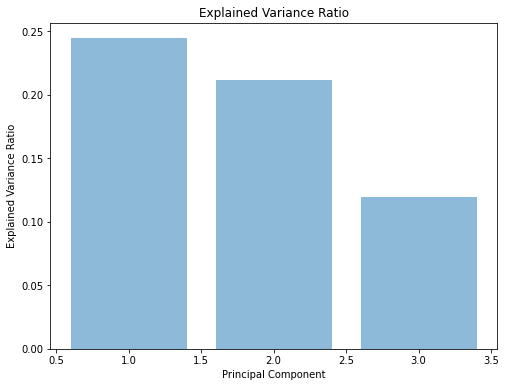

In [6]:
def plot_variance_explained(pca):
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
    plt.title('Explained Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.show()
    
# Plot the variance explained by each principal component
plot_variance_explained(pca)

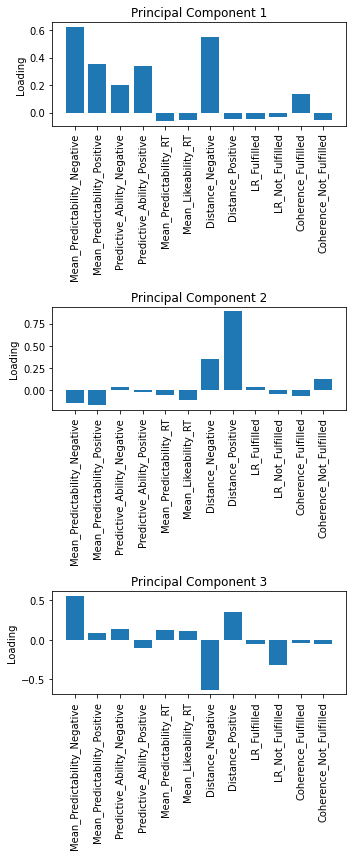

In [7]:
def plot_loadings(pca, data):
    loading_matrix = pca.components_
    plt.figure(figsize=(5, 12))

    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.bar(range(len(data.columns)), loading_matrix[i])
        plt.xticks(range(len(data.columns)), data.columns, rotation=90)
        plt.title(f'Principal Component {i+1}')
        plt.ylabel('Loading')
    plt.tight_layout()
    plt.show()

# Plot the loading vectors for each variable
plot_loadings(pca, df_features)

#### UMAP

In [8]:
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(df_features)

/Users/violetapascuallaborda/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/violetapascuallaborda/opt/anaconda3/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### **Clustering**

#### **DBSCAN**

In [9]:
# Set value for minPts
minPts = 5

#### Using PCA reduction

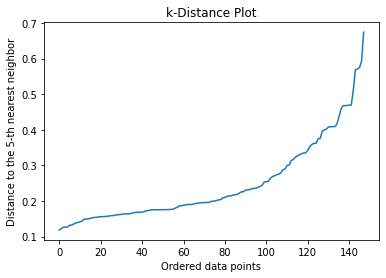

In [10]:
# Calculate distances to the k-th nearest neighbor
nbrs = NearestNeighbors(n_neighbors=minPts).fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distances = np.sort(distances[:, minPts - 1], axis=0)

# Plot the k-distance plot
plt.plot(distances)
plt.xlabel('Ordered data points')
plt.ylabel('Distance to the {}-th nearest neighbor'.format(minPts))
plt.title('k-Distance Plot')
plt.show()

In [11]:
# Set epsilon according to the k-distance plot
epsilon = 0.35

# Apply DBSCAN with the adjusted parameters
db = DBSCAN(eps=epsilon, min_samples=minPts).fit(X_pca)

# Visualization of the clusters in 3D
labels = db.labels_
unique_labels = set(labels)

# Crear un mapa de colores usando la paleta Spectral
colors = px.colors.diverging.Spectral

# Crear una gráfica 3D interactiva con una leyenda personalizada
fig = go.Figure()

for label in unique_labels:
    label_mask = (labels == label)
    fig.add_trace(go.Scatter3d(
        x=X_pca[label_mask, 0],
        y=X_pca[label_mask, 1],
        z=X_pca[label_mask, 2],
        mode='markers',
        marker=dict(size=5, color=colors[label % len(colors)]),
        name=f'Cluster {label}'
    ))

fig.update_layout(
    title='DBSCAN Clustering with PCA reduction',
    scene=dict(
        xaxis_title='PCA Dimension 1',
        yaxis_title='PCA Dimension 2',
        zaxis_title='PCA Dimension 3',
        xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
        yaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
        zaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black'))
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    title_font=dict(color='black'),
    font=dict(color='black'),
    legend=dict(
        title_font=dict(color='black'),
        font=dict(color='black'),
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02,
        orientation='v'  # Vertical
    )
)

fig.show()


#### Using UMAP reduction

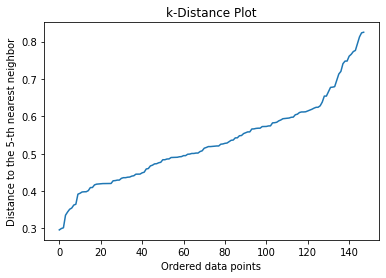

In [12]:
# Calculate distances to the k-th nearest neighbor
nbrs = NearestNeighbors(n_neighbors=minPts).fit(X_umap)
distances, indices = nbrs.kneighbors(X_umap)
distances = np.sort(distances[:, minPts - 1], axis=0)

# Plot the k-distance plot
plt.plot(distances)
plt.xlabel('Ordered data points')
plt.ylabel('Distance to the {}-th nearest neighbor'.format(minPts))
plt.title('k-Distance Plot')
plt.show()

In [13]:
# Set epsilon according to the k-distance plot
epsilon = 0.52

# Apply DBSCAN with the adjusted parameters
db = DBSCAN(eps=epsilon, min_samples=minPts).fit(X_umap)

# Visualization of the clusters in 3D
labels = db.labels_
unique_labels = set(labels)

# Crear un mapa de colores usando la paleta Spectral y cambiar el orden
colors = px.colors.diverging.Spectral[::-1]

# Crear una gráfica 3D interactiva con una leyenda personalizada
fig = go.Figure()

for label in unique_labels:
    label_mask = (labels == label)
    fig.add_trace(go.Scatter3d(
        x=X_umap[label_mask, 0],
        y=X_umap[label_mask, 1],
        z=X_umap[label_mask, 2],
        mode='markers',
        marker=dict(size=5, color=colors[label % len(colors)]),
        name=f'Cluster {label}'
    ))

fig.update_layout(
    title='DBSCAN Clustering with UMAP reduction',
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2',
        zaxis_title='UMAP Dimension 3',
        xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
        yaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
        zaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black'))
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    title_font=dict(color='black'),
    font=dict(color='black'),
    legend=dict(
        title_font=dict(color='black'),
        font=dict(color='black'),
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02,
        orientation='v'  # Vertical
    )
)

fig.show()

#### *Evaluation metrics*

In [14]:
def calculate_metrics(X, max_clusters=10):
    silhouette_scores = []
    inertia_scores = []
    davies_bouldin_scores = []
    gap_statistics = []
    reference_inertia = []
    
    for k in range(2, max_clusters + 1):
        clustering = AgglomerativeClustering(n_clusters=k)
        labels = clustering.fit_predict(X)
        
        # Silhouette score
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        
        # Sum of squared distances within the cluster (inertia)
        inertia = np.sum([np.sum(np.linalg.norm(X[labels == i] - np.mean(X[labels == i], axis=0), axis=1)**2) for i in range(k)])
        inertia_scores.append(inertia)
        
        # Davies-Bouldin score
        davies_bouldin_avg = davies_bouldin_score(X, labels)
        davies_bouldin_scores.append(davies_bouldin_avg)
        
        # Gap statistic
        ref_inertia = np.mean([np.sum([np.sum(np.linalg.norm(X[np.random.permutation(len(X))] - np.mean(X[np.random.permutation(len(X))], axis=0), axis=1)**2) for _ in range(k)]) for _ in range(10)])
        gap_statistics.append(np.log(ref_inertia) - np.log(inertia))
        reference_inertia.append(ref_inertia)
        
    return silhouette_scores, inertia_scores, davies_bouldin_scores, gap_statistics

def plot_silhouette_davies_bouldin(silhouette_scores, davies_bouldin_scores, max_clusters=10):
    clusters_range = range(2, max_clusters + 1)
    
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('Silhouette score', color=color)
    ax1.plot(clusters_range, silhouette_scores, 'o-', color=color, label='Silhouette score')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Davies-Bouldin score', color=color)
    ax2.plot(clusters_range, davies_bouldin_scores, 'o-', color=color, label='Davies-Bouldin score')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    fig.legend(loc='upper right')
    plt.show()

def plot_inertia_gap(inertia_scores, gap_statistics, max_clusters=10):
    clusters_range = range(2, max_clusters + 1)
    
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(clusters_range, inertia_scores, 'o-', color=color, label='Inertia')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Gap statistic', color=color)
    ax2.plot(clusters_range, gap_statistics, 'o-', color=color, label='Gap statistic')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    fig.legend(loc='upper right')
    plt.show()

#### **Hierarchical Clustering, Aglomerative clustering**

#### Using PCA reduction

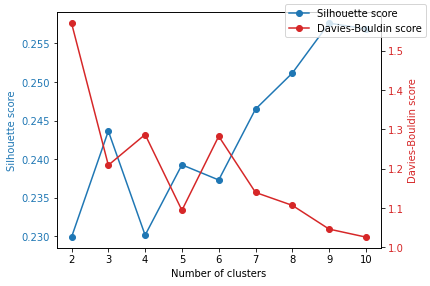

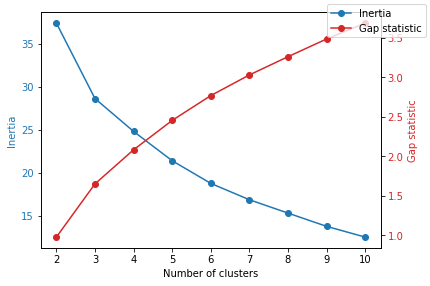

In [15]:
silhouette_scores, inertia_scores, davies_bouldin_scores, gap_statistics = calculate_metrics(X_pca)
plot_silhouette_davies_bouldin(silhouette_scores, davies_bouldin_scores)
plot_inertia_gap(inertia_scores, gap_statistics)

In [16]:
best_n_clusters = 3

clustering_pca = AgglomerativeClustering(n_clusters=best_n_clusters)
labels_pca = clustering_pca.fit_predict(X_pca)

# Visualization of the clusters in 3D
fig = px.scatter_3d(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    z=X_pca[:, 2], 
    color=labels_pca.astype(str),
    title=f'Clustering Aglomerativo con {best_n_clusters} Clusters',
    labels={'x': 'PCA Dimension 1', 'y': 'PCA Dimension 2', 'z': 'PCA Dimension 3'},
    color_continuous_scale='Spectral'
)

fig.update_traces(marker=dict(size=5)) 
fig.update_layout(
    scene=dict(
        xaxis_title='PCA Dimension 1',
        yaxis_title='PCA Dimension 2',
        zaxis_title='PCA Dimension 3',
        xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
        yaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
        zaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black'))
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    title_font=dict(color='black'),
    font=dict(color='black'),
    legend=dict(
        title_font=dict(color='black'),
        font=dict(color='black'),
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02,
        orientation='v'  # Vertical
    )
)

fig.show()

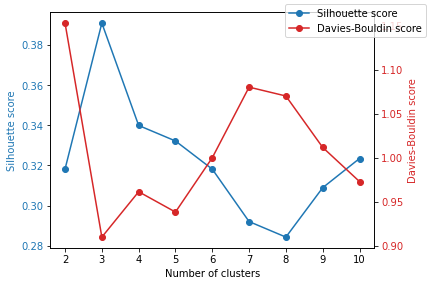

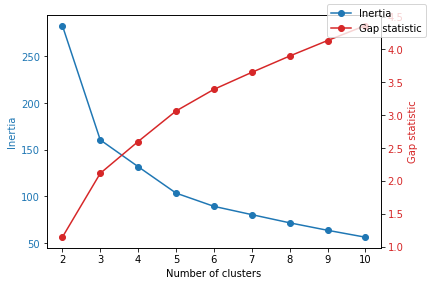

In [17]:
silhouette_scores, inertia_scores, davies_bouldin_scores, gap_statistics = calculate_metrics(X_umap)
plot_silhouette_davies_bouldin(silhouette_scores, davies_bouldin_scores)
plot_inertia_gap(inertia_scores, gap_statistics)

#### Using UMAP reduction

In [18]:
best_n_clusters = 3

clustering_umap = AgglomerativeClustering(n_clusters=best_n_clusters)
labels_umap = clustering_umap.fit_predict(X_umap)

# Visualization of the clusters in 3D
fig = px.scatter_3d(
    x=X_umap[:, 0], 
    y=X_umap[:, 1], 
    z=X_umap[:, 2], 
    color=labels_umap.astype(str),
    title=f'Clustering Aglomerativo con {best_n_clusters} Clusters',
    labels={'x': 'UMAP Dimension 1', 'y': 'UMAP Dimension 2', 'z': 'UMAP Dimension 3'},
    color_continuous_scale='Spectral'
)

fig.update_traces(marker=dict(size=5)) 
fig.update_layout(
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2',
        zaxis_title='UMAP Dimension 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

#### Check if the clusters obtained with both methods are similar

In [19]:
# Calculate the adjusted Rand index between the labels obtained with PCA and UMAP
ari_score = adjusted_rand_score(labels_pca, labels_umap)
print(f'Adjusted Rand Index between PCA and UMAP clustering: {ari_score}')

Adjusted Rand Index between PCA and UMAP clustering: 0.4508096544396608


### **Save cluster labels**

In [20]:
df_cluster = pd.DataFrame()
df_cluster['Participant_ID'] = df['Participant_ID']
df_cluster['Mean_Predictability_Negative'] = df['Mean_Predictability_Negative']
df_cluster['Cluster'] = labels_pca
#df_cluster['Cluster_UMAP'] = labels_umap

df_cluster.to_excel('/Users/violetapascuallaborda/Desktop/Analysis/Clusters.xlsx', index=False)

/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_14055/3268258363.py:7: UserWarning:

Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).



### **Metrics of predictive processing for each cluster**

In [21]:
# Assuming that df and labels_pca are already defined
df['Cluster'] = labels_pca
all_metrics = [
    'Mean_Predictability_Negative', 'Mean_Predictability_Positive', 'Predictive_Ability_Negative', 
    'Predictive_Ability_Positive', 'Mean_Predictability_RT', 'Mean_Likeability_RT', 
    'Distance_Negative', 'Distance_Positive', 'LR_Fulfilled', 'LR_Not_Fulfilled', 
    'Coherence_Fulfilled', 'Coherence_Not_Fulfilled'
]

# Calculate metrics for each cluster
agg_funcs = {metric: ['mean', 'std'] for metric in all_metrics}
metrics = df.groupby('Cluster').agg(agg_funcs)
metrics.columns = ['_'.join(col) for col in metrics.columns]
metrics = metrics.reset_index()

# Add cluster size
metrics['Cluster_Size'] = df['Cluster'].value_counts().sort_index().values

# Calculate SE for each metric
for metric in all_metrics:
    metrics[f'{metric}_SE'] = metrics[f'{metric}_std'] / np.sqrt(metrics['Cluster_Size'])

# Limit values to two decimal places
metrics = metrics.round(2)

# Order clusters by 'Mean_Predictability_Negative_mean'
ordered_clusters = df.groupby('Cluster')['Mean_Predictability_Negative'].mean().sort_values().index
df['Cluster'] = pd.Categorical(df['Cluster'], categories=ordered_clusters, ordered=True)

# Create a Word document
doc = Document()

# Function to add metrics to the document
def add_metrics_to_doc(group_name, variables, doc):
    doc.add_heading(group_name, level=1)
    
    for variable in variables:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.boxplot(ax=ax, x='Cluster', y=variable, data=df, order=ordered_clusters)
        
        # Save the figure in a buffer
        import io
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png', bbox_inches='tight')
        buffer.seek(0)
        
        # Add the image to the document
        doc.add_picture(buffer, width=Inches(6))
        plt.close(fig)
        buffer.close()
        
        # Add table of metrics
        table_data = metrics[['Cluster', 'Cluster_Size', f'{variable}_mean', f'{variable}_std', f'{variable}_SE']]
        table = doc.add_table(rows=1, cols=len(table_data.columns))
        
        # Add borders to the table
        tbl = table._tbl  # Get the actual table xml element
        for cell in tbl.iter_tcs():
            tcPr = cell.tcPr  # Get the table cell properties element
            tcBorders = OxmlElement('w:tcBorders')  # Create a new borders element

            for border_name in ['top', 'start', 'bottom', 'end']:
                border = OxmlElement(f'w:{border_name}')
                border.set(qn('w:val'), 'single')
                border.set(qn('w:sz'), '4')  # 4 twips is 0.5 pt
                border.set(qn('w:space'), '0')
                border.set(qn('w:color'), '000000')  # Black color
                tcBorders.append(border)

            tcPr.append(tcBorders)  # Append the borders element to the cell properties

        hdr_cells = table.rows[0].cells
        for i, col_name in enumerate(table_data.columns):
            hdr_cells[i].text = col_name
        
        for row in table_data.itertuples(index=False):
            row_cells = table.add_row().cells
            for i, value in enumerate(row):
                row_cells[i].text = str(value)
                
                # Add borders to each data cell
                tcPr = row_cells[i]._element.get_or_add_tcPr()
                tcBorders = OxmlElement('w:tcBorders')
                for border_name in ['top', 'start', 'bottom', 'end']:
                    border = OxmlElement(f'w:{border_name}')
                    border.set(qn('w:val'), 'single')
                    border.set(qn('w:sz'), '4')
                    border.set(qn('w:space'), '0')
                    border.set(qn('w:color'), '000000')
                    tcBorders.append(border)
                tcPr.append(tcBorders)

        doc.add_paragraph()

# Add metrics to the document
add_metrics_to_doc('Metrics Analysis', all_metrics, doc)

# Save the document
doc.save('/Users/violetapascuallaborda/Desktop/Analysis/Predictive_Processing_Boxplots.docx')